In [2]:
# import the doubleMatrix class in the same directory 
import doubleMatrix as dm
import time
import numpy as np
import matplotlib.pyplot as plt

# create a function to test the block decomposition for different minimum sub-block sizes 
def runtime(matrix_size, n0_values, repeats):
    # generate two arrays using the doubleMatrix class 
    A = dm.doubleMatrix(matrix_size, matrix_size).random_matrix(0, 10)
    B = dm.doubleMatrix(matrix_size, matrix_size).random_matrix(0, 10)

    # create an array to store runtimes for each sub-block size 
    recursive_runtimes = []

    naive_times = []
    for _ in range(repeats):
            # time the runtime of the recursive matrix decomposition 
            start = time.perf_counter()
            A.naive_mult(B)
            end = time.perf_counter()
            naive_times.append(end - start)
        # append each runtime to the runtime list 
    naive_runtimes = sum(naive_times) / repeats

    # for each sub-block size in the provided list
    for n0 in n0_values:
        times = []
        # for the number of input repeats 
        for _ in range(repeats):
            # time the runtime of the recursive matrix decomposition 
            start = time.perf_counter()
            A.matrix_recursive_mult(B, n0=n0)
            end = time.perf_counter()
            times.append(end - start)
        # append each runtime to the runtime list 
        recursive_runtimes.append(sum(times) / repeats)

    return recursive_runtimes, naive_runtimes

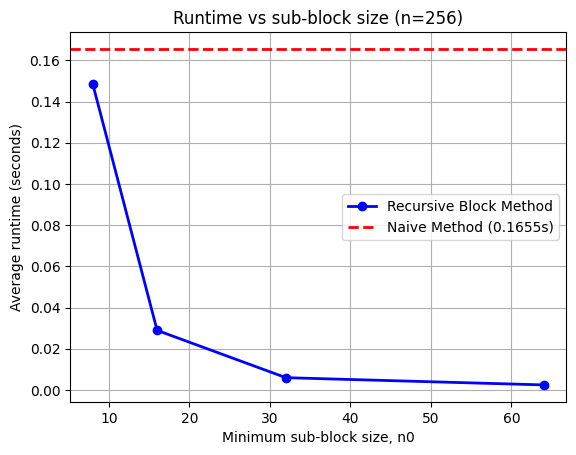

Optimal n0: 64
Naive time: 0.1655s


In [3]:
# create function to plot runtimes 
def plot_runtime(matrix_size, n0_values, repeats):
    recursive_runtimes, naive_runtimes = runtime(matrix_size, n0_values, repeats)
    
    plt.figure()
    plt.plot(n0_values, recursive_runtimes, marker='o', linewidth=2, label="Recursive Block Method", color="blue")
    plt.axhline(y=naive_runtimes, color='red', linestyle='--', linewidth=2, label=f'Naive Method ({naive_runtimes:.4f}s)')
    plt.xlabel("Minimum sub-block size, n0")
    plt.ylabel("Average runtime (seconds)")
    plt.title(f"Runtime vs sub-block size (n={matrix_size})")
    plt.grid(True)
    plt.legend()
    plt.show()

    best_n0 = n0_values[np.argmin(recursive_runtimes)]
    print(f"Optimal n0: {best_n0}")
    print(f"Naive time: {naive_runtimes:.4f}s") 



#set value of repeats
repeats = 3
# set minimum sub-block sizes
n0_values = [8, 16, 32, 64]
# plot runtimes
plot_runtime(256, n0_values, repeats)
